In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [35]:
data = pd.read_csv("D:/Prodigy/Task 3/bank-full.csv")

In [36]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
data.shape

(45211, 17)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [40]:
def countplot(data,x_col,hue_col):
    plt.figure(figsize=(6,4))
    sns.countplot(data,x=x_col,hue=hue_col)
    plt.xlabel(f'{x_col.capitalize()}')
    plt.ylabel('Number of Clients')
    plt.xticks(rotation=90)
    plt.legend(title='Has a Term Deposit')
    plt.title(f'Distribution of {x_col.capitalize()} and Term Deposit')
    plt.show()
    

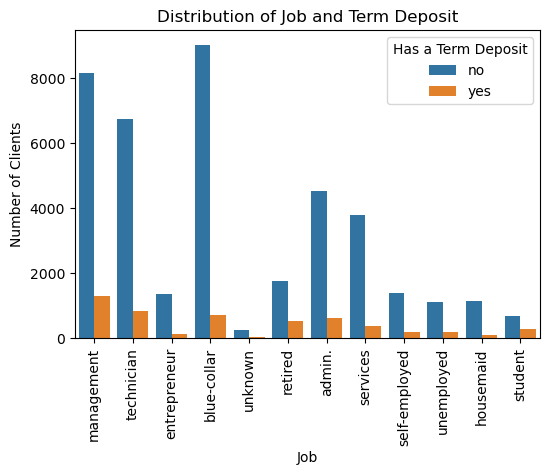

In [41]:
countplot(data,x_col='job',hue_col='y')

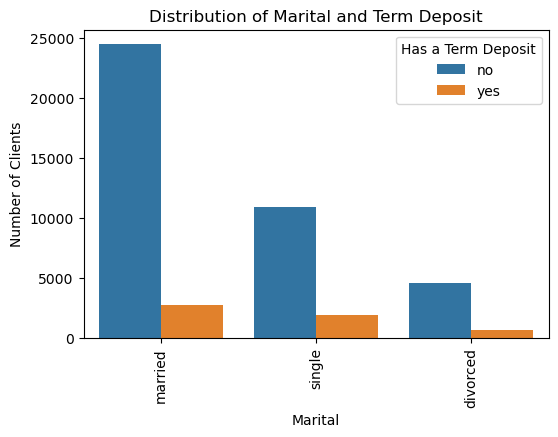

In [42]:
countplot(data,x_col='marital',hue_col='y')

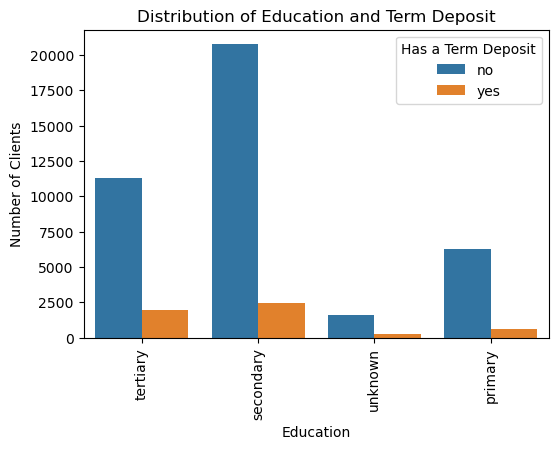

In [43]:
countplot(data,x_col='education',hue_col='y')

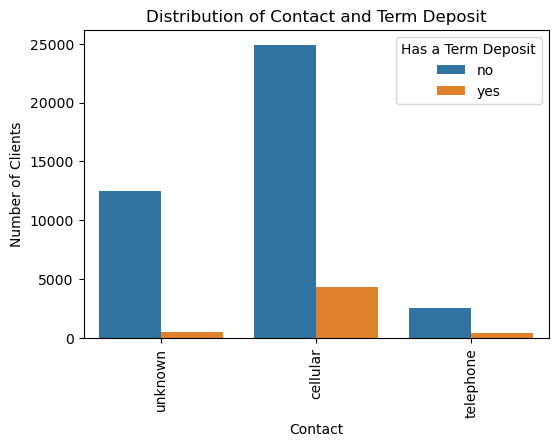

In [44]:
countplot(data,x_col='contact',hue_col='y')

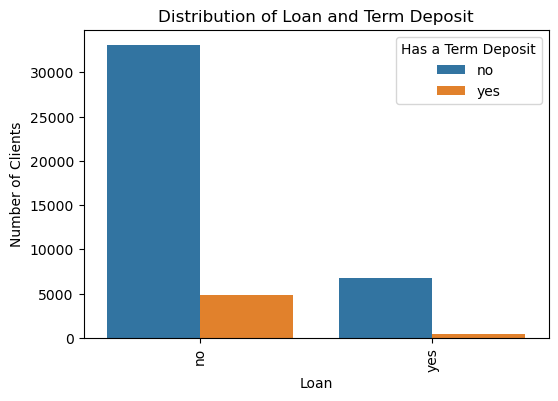

In [45]:
countplot(data,x_col='loan',hue_col='y')

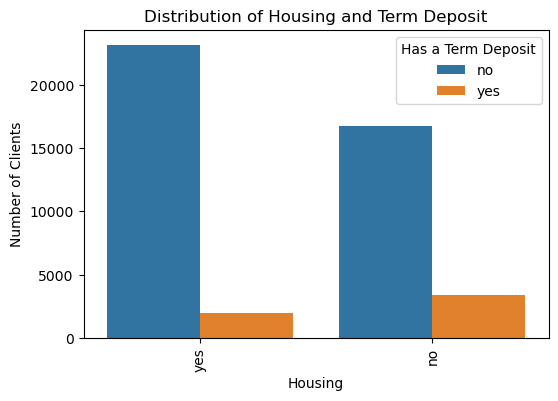

In [46]:
countplot(data,x_col='housing',hue_col='y')

In [47]:
data.y = data.y.map({'no':0,'yes':1}).astype('uint8')

In [48]:
adata= data[['age','balance','duration','campaign','pdays','previous','y']]
corr = adata.corr()
corr.style.background_gradient(cmap='PuBu')

,age,balance,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674,0.052838
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,0.394521,-0.073172,0.103621,0.093236,1.000000


In [49]:
columnstoencode = ['default','housing','loan','contact'] 

for column in columnstoencode:
    data[column] = label_encoder.fit_transform(data[column])

data.poutcome = data.poutcome.map({'other':0,'unknown':0,'failure':0,'success':1}).astype('uint8')

data.campaign = data.campaign.astype('uint8')
data.pdays = data.pdays.astype('uint8')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,2,5,may,261,1,255,0,0,0
1,44,technician,single,secondary,0,29,1,0,2,5,may,151,1,255,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,2,5,may,76,1,255,0,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,2,5,may,92,1,255,0,0,0
4,33,unknown,single,unknown,0,1,0,0,2,5,may,198,1,255,0,0,0


In [50]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['job'] = label_encoder.fit_transform(data['job'])
data['marital'] = label_encoder.fit_transform(data['marital'])
data['education'] = label_encoder.fit_transform(data['education'])
data['month'] = label_encoder.fit_transform(data['month'])

data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,255,0,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,255,0,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,255,0,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,255,0,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,255,0,0,0


In [51]:
X = data.drop('y',axis=1)
y = data['y']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
dt_model = DecisionTreeClassifier(max_depth =2, random_state=50)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy:", dt_accuracy)

Accuracy: 0.893177043016698


In [62]:
dt_params = {'max_depth': [None, 10, 20, 30, 40, 50]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
dt_best_model = dt_grid.best_estimator_
dt_best_predictions = dt_best_model.predict(X_test)
dt_best_accuracy = accuracy_score(y_test, dt_best_predictions)
print("Best accuracy:", dt_best_accuracy)

Best accuracy: 0.8948357845847617


In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, dt_predictions))
print('\nClassification Report:')
print(classification_report(y_test, dt_predictions))

Accuracy: 0.89
Confusion Matrix:


NameError: name 'confusion_matrix' is not defined